<a href="https://colab.research.google.com/github/Marc86316/DataCamp/blob/main/Exploratory_Data_Analysis_in_Python/Relationships_in_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relationships in Data**

Variables in datasets don't exist in a vacuum; they have relationships with each other. In this chapter, you'll look at relationships across numerical, categorical, and even DateTime data, exploring the direction and strength of these relationships as well as ways to visualize them.

In [ ]:
# import neccesary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import dataset
divorce_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/dataset/Exploratory_Data_Analysis_in_Python/divorce.csv"
divorce = pd.read_csv(divorce_url)
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


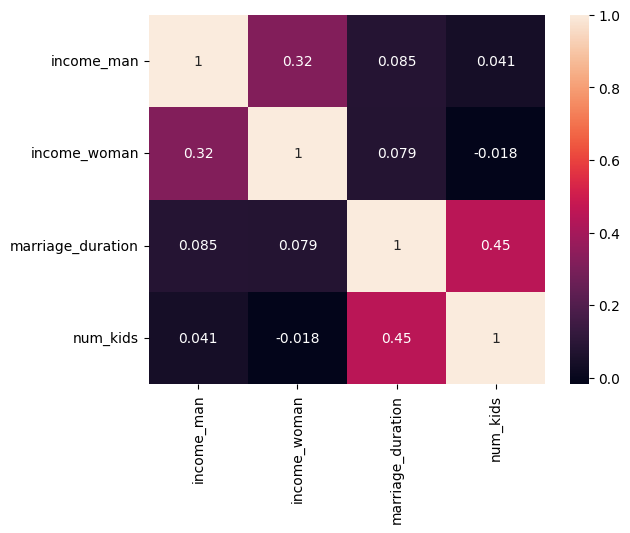

In [ ]:
# Convert 'divorce_date' to datetime objects
divorce['divorce_date'] = pd.to_datetime(divorce['divorce_date'])

# Extract numerical features for correlation analysis
numerical_features = divorce.select_dtypes(include=np.number)

# Calculate and plot the correlation matrix
sns.heatmap(numerical_features.corr(), annot=True)
plt.show()

1. Convert 'divorce_date' to datetime: The line
```
divorce['divorce_date'] = pd.to_datetime(divorce['divorce_date'])
```
converts the `'divorce_date'` column to datetime objects. This is essential because correlation analysis is typically performed on **numerical data**.

2. Select numerical features:
```
numerical_features = divorce.select_dtypes(include=np.number)
```
**extracts only the numerical columns** from the DataFrame. This ensures that only numerical data is used for correlation calculation.

3. Calculate and plot correlation:
```
sns.heatmap(numerical_features.corr(), annot=True)
```
calculates the correlation matrix for the numerical features and generates the heatmap.


# **Correlation**

## Exercise - **Interpreting a heatmap**

Which of the below statements is *correct* regarding the relationships between variables in the `divorce` DataFrame?

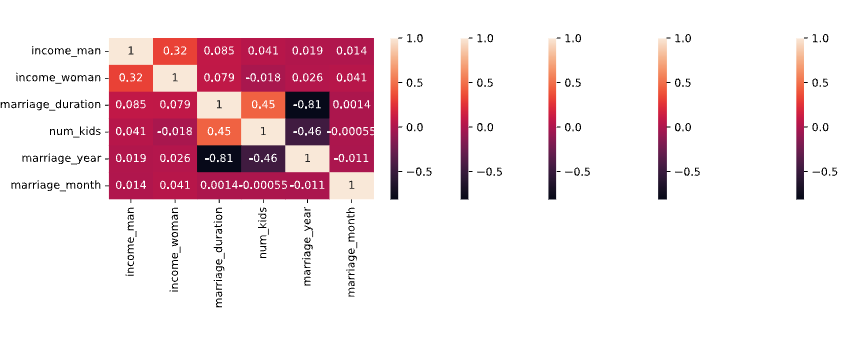

**Possible answers**

1. marriage_duration is strongly positively correlated with marriage_month.

2. The correlation between num_kids and income_man is stronger than the correlation between num_kids and marriage_duration.

3. A later marriage_year causes a lower number of children, represented by num_kids.

4. A later marriage_year is correlated with having fewer children.

In [ ]:
# sns.heatmap(divorce.corr(), annot=True)
# plt.show()

## Exercise - **Visualizing variable relationships**

In the last exercise, you may have noticed that a longer `marriage_duration` is correlated with having more children, represented by the `num_kids` column. The correlation coefficient between the `marriage_duration` and `num_kids` variables is `0.45`

**Instructions**

Create a scatterplot showing `marriage_duration` on the x-axis and `num_kids` on the y-axis

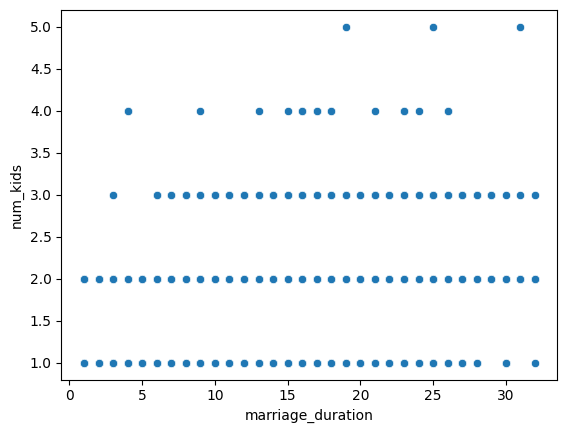

In [ ]:
# Create the scatterplot
sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids')
plt.show()

**Result** : There is a slight positive relationship in your scatterplot. In the dataset, couples with no children have no value in the `num_kids` column. If you are confident that all or most of the missing values in `num_kids` are related to couples without children, you could consider updating these values to 0, which might increase the correlation.


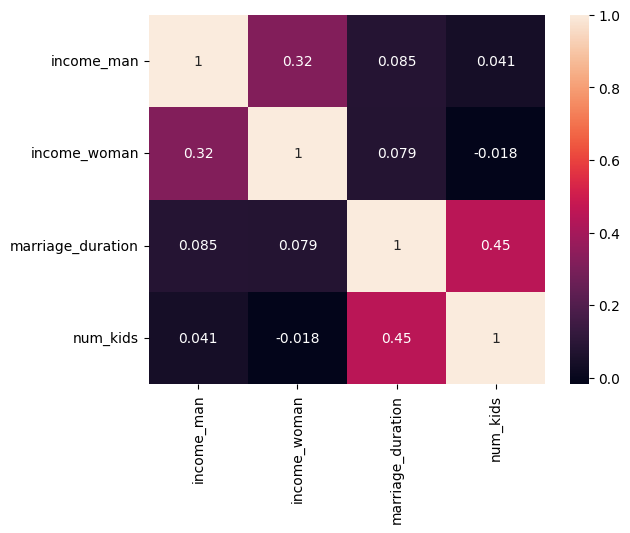

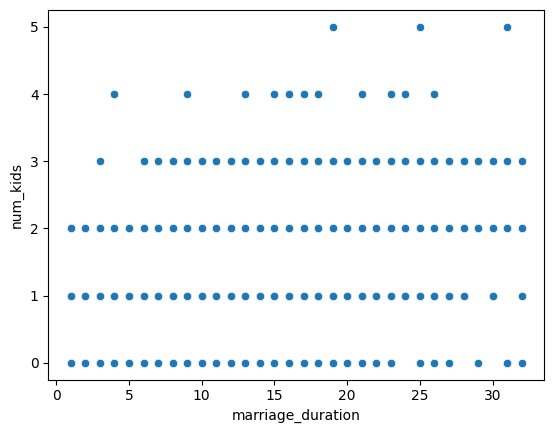

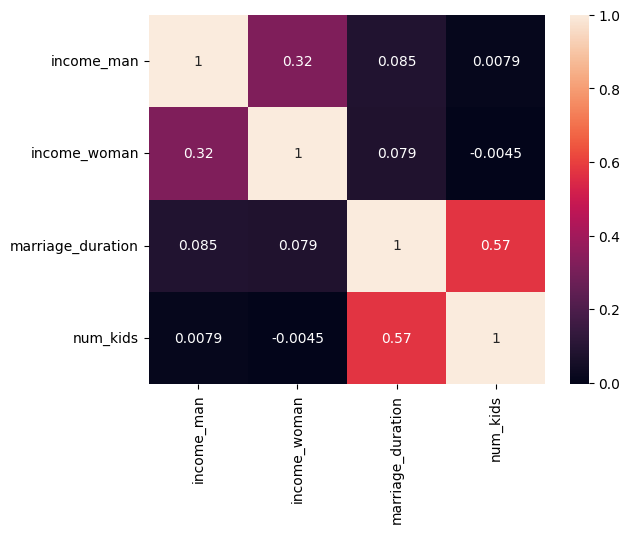

In [ ]:
# Calculate and plot the correlation matrix using numerical_features
sns.heatmap(numerical_features.corr(), annot=True)
plt.show()

# Fill NaN values in 'num_kids' with 0
divorce['num_kids'] = divorce['num_kids'].fillna(0)

# Update numerical_features to include the updated 'num_kids'
numerical_features = divorce.select_dtypes(include=np.number)

# Create the scatterplot
sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids')
plt.show()

# Calculate and plot the updated correlation matrix
sns.heatmap(numerical_features.corr(), annot=True) # Use numerical_features instead of divorce['num_kids']
plt.show()


**marriage_year column still have issue ** 2025/03/16


## Exercise - **Visualizing multiple variable relationships**

Seaborn's `.pairplot()` is excellent for understanding the relationships between several or all variables in a dataset by aggregating pairwise scatter plots in one visual.

**Instructions**

Create a pairplot to visualize the relationships between `income_woman` and `marriage_duration` in the `divorce` DataFrame.



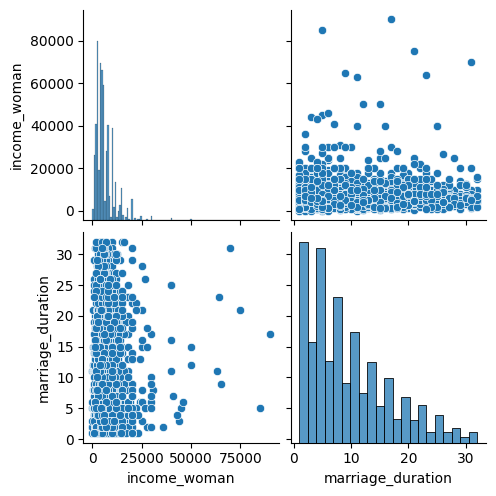

In [ ]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars=['income_woman' , 'marriage_duration'])
plt.show()

**Result** :Just as in the correlation matrix, you can see that the relationship between `income_woman` and `marriage_duration` is not a strong one. You can also get a sense of the distributions of both variables in the upper left and lower right plots.

# **Factor relationships and distributions**

## Exercise - **Categorical data in scatter plots**

In the video, we explored how men's education and age at marriage related to other variables in our dataset, the divorce DataFrame. Now, you'll take a look at how women's education and age at marriage relate to other variables!

Your task is to create a scatter plot of each woman's age and income, layering in the categorical variable of education level for additional context.

In [ ]:
# Step 1: Convert date columns to datetime
divorce['dob_woman'] = pd.to_datetime(divorce['dob_woman'])
divorce['marriage_date'] = pd.to_datetime(divorce['marriage_date'])

# Step 2: Calculate the age at marriage as the difference in years
divorce['woman_age_marriage'] = divorce['marriage_date'].dt.year - divorce['dob_woman'].dt.year

# The DataFrame now has the 'woman_age_marriage' column

The `divorce` DataFrame has been loaded for you, and `woman_age_marriage` has already been defined as a column representing an estimate of the woman's age at the time of marriage.

**Explanation**
1. Datetime Conversion: Converting `dob_woman` and `marriage_date` to datetime objects allows us to extract the year using `.dt.year`.
2. Year Difference: The age is estimated by subtracting the birth year from the marriage year, providing a simple integer estimate. This method doesn’t adjust for whether the woman’s birthday has occurred in the marriage year, which aligns with the sample output.
3. Result: The new column `woman_age_marriage` contains integer values representing the estimated age at marriage, consistent with the DataCamp example.

**Instructions**

Create a scatter plot that shows woman_age_marriage on the x-axis and income_woman on the y-axis; each data point should be colored based on the woman's level of education, represented by education_woman.

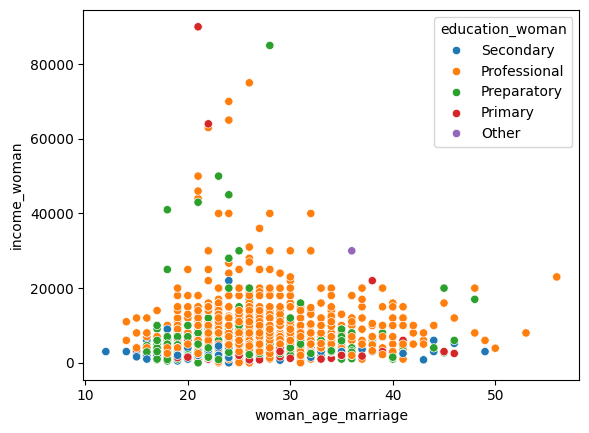

In [ ]:
# Create the scatter plot
sns.scatterplot(data=divorce, x='woman_age_marriage', y='income_woman', hue='education_woman')
plt.show()

**Result** : Awesome—it looks like there is a positive correlation between professional education and higher salaries, as you might expect. The relationship between women's age at marriage and education level is a little less clear.

## Exercise - **Exploring with KDE plots**

Kernel Density Estimate (KDE) plots are a great alternative to histograms when you want to show multiple distributions in the same visual.

Suppose you are interested in the relationship between marriage duration and the number of kids that a couple has. Since values in the `num_kids` column range only from one to five, you can plot the KDE for each value on the same plot.

The `divorce` DataFrame has been loaded for you. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

Recall that the `num_kids` column in divorce lists only N/A values for couples with no children, so you'll only be looking at distributions for divorced couples with at least one child.

**Instructions**

* Create a KDE plot that shows `marriage_duration` on the x-axis and a different colored line for each possible number of children that a couple might have, represented by `num_kids`.

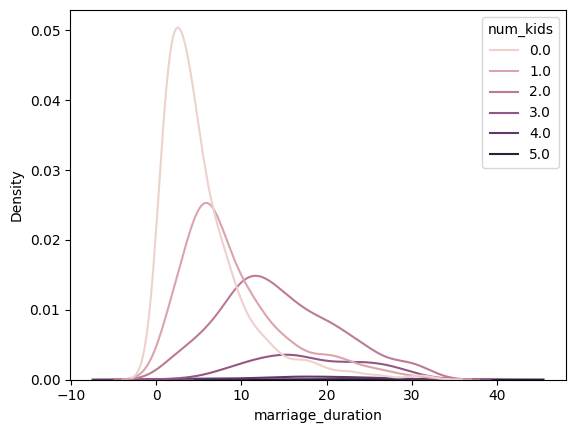

In [ ]:
# Create the KDE plot
sns.kdeplot(data=divorce, x='marriage_duration', hue='num_kids')
plt.show()

* Notice that the plot currently shows marriage durations less than zero; update the KDE plot so that marriage duration cannot be smoothed past the extreme data points.

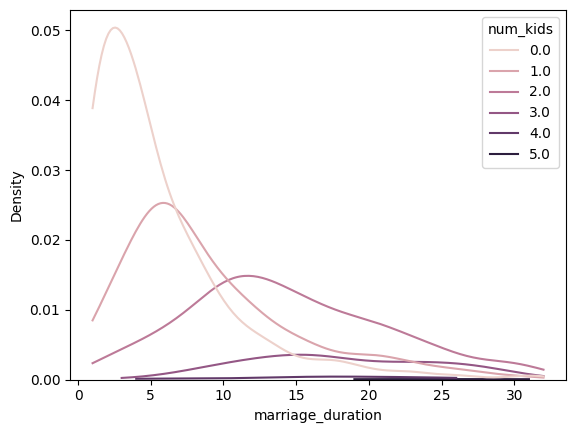

In [ ]:
# Update the KDE plot so that marriage duration can't be smoothed too far
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0)
plt.show()

* Update the code for the KDE plot from the previous step to show a cumulative distribution function for each number of children a couple has.

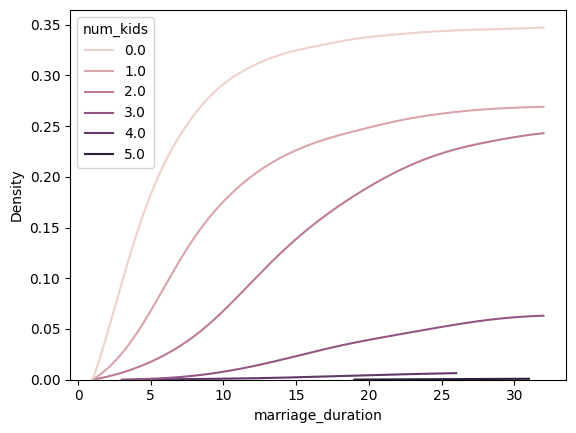

In [ ]:
# Update the KDE plot to show a cumulative distribution function
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()

## **Your recent learnings**

You learned about the relationships between various types of variables in datasets, focusing on categorical variables and their interactions with numerical ones. Specifically, you explored:

  * The concept of categorical variables, using the `education_man` variable to understand the distribution of education levels among men in a dataset. Categorical variables, unlike numerical ones, are best summarized and explored through visualizations rather than numerical summaries.

  * How to visualize the relationship between two variables using histograms and Seaborn's Kernel Density Estimate (KDE) plots. For instance, you examined the relationship between marriage duration and male education level, learning that KDE plots provide a clearer view of distribution peaks across different categories compared to histograms.

  * The importance of adjusting KDE plot parameters, such as the `cut` keyword, to avoid misleading representations in data visualization. You saw how setting `cut=0` can limit the curve to realistic data ranges, eliminating impossible values like negative marriage durations.

  * Integrating categorical data into scatter plots to analyze relationships between numerical variables and categories. You created a scatter plot to investigate the correlation between the age at marriage and education level, using the `hue` argument to differentiate data points by education level.

  * The practical application of these concepts through exercises, including creating a scatter plot to explore the relationship between women's age at marriage, their income, and education level. The code snippet provided was:
```
# Create the scatter plot
sns.scatterplot(data=divorce, x="woman_age_marriage", y="income_woman", hue="education_woman")
plt.show()
```

  * Lastly, you delved into using KDE plots for comparing distributions across different categories, such as the number of kids in a marriage, to understand how certain factors might influence the duration of a marriage.

This lesson equipped you with tools to visualize and analyze the complex relationships between different types of variables in a dataset, enhancing your data exploration and interpretation skills.
